In [330]:
import numpy as np

In [603]:
# prepare training data
n_samples = 100000
batch_size = 64
theta = np.random.uniform(low = 0.0, high = 1.0, size = n_samples)
nu = np.random.uniform(low = 0.0, high = 1.0, size = n_samples)

In [604]:
#x = [np.random.multivariate_normal(mean = [cur_theta ** 2, cur_nu], cov = 0.8 * np.eye(2), size = 1) for cur_theta, cur_nu in zip(theta, nu)]
#x = np.squeeze(np.array(x), 1)

In [605]:
#x = [np.random.normal(loc = cur_nu, scale = 0.1 * cur_theta, size = 1) for cur_theta, cur_nu in zip(theta, nu)]
#x = np.array(x)

In [606]:
theta = np.random.uniform(low = 0.0, high = 1.0, size = n_samples)
nu = np.random.uniform(low = 0.0, high = 1.0, size = n_samples)
sig = np.array([np.random.normal(loc = cur_theta, scale = 0.3, size = 1) for cur_theta in theta]).flatten()
bkg = np.array([np.random.exponential(scale = cur_nu, size = 1) for cur_nu in nu]).flatten()
dec = np.random.uniform(low = 0.0, high = 1.0, size = n_samples)
x = np.expand_dims(np.array([cur_sig if cur_dec > 0.1 else cur_bkg for cur_sig, cur_bkg, cur_dec in zip(sig, bkg, dec)]), 1)

In [607]:
x.shape

(100000, 1)

In [608]:
target = np.array([theta, nu])
target = np.transpose(target)

In [609]:
# batch dimension always comes first!
target.shape

(100000, 2)

In [639]:
import keras.backend as K

def make_loss():
    def loss_total(y_true, y_pred):
        return K.binary_crossentropy(y_pred[:,1], y_true[:,1]) +\
               K.binary_crossentropy(y_pred[:,0], y_true[:,0]) -\
               0.3 * K.binary_crossentropy(y_pred[:,1], y_true[:,0])-\
               0.3 * K.binary_crossentropy(y_pred[:,0], y_true[:,1])

    return loss_total

In [640]:
from keras.models import Model
from keras.layers import Input, Dense, RepeatVector

In [641]:
inputs = Input(shape = (x.shape[1],))
lay = Dense(20, activation = "relu")(inputs)
lay = Dense(20, activation = "relu")(lay)
lay = Dense(20, activation = "relu")(lay)
outputs = Dense(2, activation = "sigmoid")(lay)
#outputs = RepeatVector(2)(lay)

gen = Model(input = [inputs], output = [outputs])

/usr/lib/python3/dist-packages/ipykernel/__main__.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=[<tf.Tenso..., inputs=[<tf.Tenso...)`


In [642]:
gen.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_36 (InputLayer)        (None, 1)                 0         
_________________________________________________________________
dense_141 (Dense)            (None, 20)                40        
_________________________________________________________________
dense_142 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_143 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_144 (Dense)            (None, 2)                 42        
Total params: 922
Trainable params: 922
Non-trainable params: 0
_________________________________________________________________


In [643]:
from keras.optimizers import SGD
opt_gen = SGD(momentum = 0.0, lr = 1e-2)

In [644]:
gen.compile(loss = [make_loss()], optimizer = opt_gen)

In [645]:
gen.fit(x, target, epochs = 10)

Epoch 1/10
100000/100000 [==============================] - 4s 38us/step - loss: 1.0689
Epoch 2/10
100000/100000 [==============================] - 3s 30us/step - loss: 0.8556
Epoch 3/10
100000/100000 [==============================] - 3s 30us/step - loss: 0.8487
Epoch 4/10
100000/100000 [==============================] - 3s 30us/step - loss: 0.8470
Epoch 5/10
100000/100000 [==============================] - 3s 31us/step - loss: 0.8463
Epoch 6/10
100000/100000 [==============================] - 3s 30us/step - loss: 0.8459
Epoch 7/10
100000/100000 [==============================] - 3s 31us/step - loss: 0.8456
Epoch 8/10
100000/100000 [==============================] - 3s 33us/step - loss: 0.8441
Epoch 9/10
100000/100000 [==============================] - 3s 32us/step - loss: 0.8451
Epoch 10/10
100000/100000 [==============================] - 3s 32us/step - loss: 0.8446


In [646]:
# generate points to sample the output
n_testsamples = 50000
#theta_test = np.random.uniform(low = 0.0, high = 1.0, size = n_testsamples)
#nu_test = np.random.uniform(low = 0.0, high = 1.0, size = n_testsamples)
#x_test = np.array([theta_test, nu_test])
#x_test = np.transpose(x_test)

In [647]:
#x_test = [np.random.normal(loc = cur_nu, scale = 0.1 * cur_theta, size = 1) for cur_theta, cur_nu in zip(theta_test, nu_test)]
#x_test = np.array(x_test)

In [648]:
theta_test = np.random.uniform(low = 0.0, high = 1.0, size = n_testsamples)
nu_test = np.random.uniform(low = 0.0, high = 1.0, size = n_testsamples)
sig_test = np.array([np.random.normal(loc = cur_theta, scale = 0.3, size = 1) for cur_theta in theta_test]).flatten()
bkg_test = np.array([np.random.exponential(scale = cur_nu, size = 1) for cur_nu in nu_test]).flatten()
dec_test = np.random.uniform(low = 0.0, high = 1.0, size = n_testsamples)
x_test = np.expand_dims(np.array([cur_sig if cur_dec > 0.5 else cur_bkg for cur_sig, cur_bkg, cur_dec in zip(sig_test, bkg_test, dec_test)]), 1)

In [649]:
pred = gen.predict(x_test)

In [650]:
pred_a = [cur_pred[1] for cur_pred, cur_nu in zip(pred, nu_test) if cur_nu < 0.1]
pred_b = [cur_pred[1] for cur_pred, cur_nu in zip(pred, nu_test) if cur_nu > 0.9]

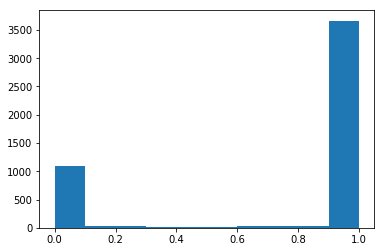

In [651]:
plt.hist(pred_a)
plt.show()

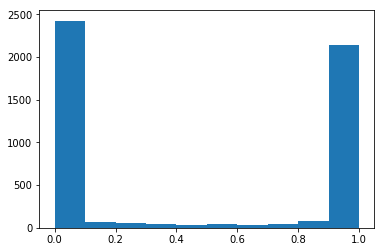

In [652]:
plt.hist(pred_b)
plt.show()

In [653]:
theta_corr = pred[:,0]
nu_corr = pred[:,1]

/usr/lib/python3/dist-packages/ipykernel/__main__.py:6: MatplotlibDeprecationWarning: The griddata function was deprecated in Matplotlib 2.2 and will be removed in 3.1. Use scipy.interpolate.griddata instead.
/home/philipp/.local/lib/python3.5/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'interp'
  s)


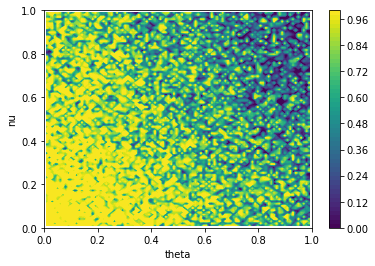

In [654]:
import matplotlib.pyplot as plt
from matplotlib.mlab import griddata

xi = np.linspace(0, 1, 100)
yi = np.linspace(0, 1, 100)
zi = griddata(theta_test, nu_test, nu_corr, xi, yi, interp="linear")

plt.contourf(xi, yi, zi, interp='linear', levels = 50)
plt.xlabel('theta')
plt.ylabel('nu')
plt.colorbar()
plt.show()
#plt.savefig("theta_decorr.png")
plt.clf()

/usr/lib/python3/dist-packages/ipykernel/__main__.py:6: MatplotlibDeprecationWarning: The griddata function was deprecated in Matplotlib 2.2 and will be removed in 3.1. Use scipy.interpolate.griddata instead.
/home/philipp/.local/lib/python3.5/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'interp'
  s)


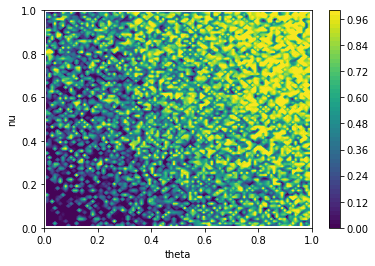

In [655]:
import matplotlib.pyplot as plt
from matplotlib.mlab import griddata

xi = np.linspace(0, 1, 100)
yi = np.linspace(0, 1, 100)
zi = griddata(theta_test, nu_test, theta_corr, xi, yi, interp="linear")

plt.contourf(xi, yi, zi, interp='linear', levels = 50)
plt.xlabel('theta')
plt.ylabel('nu')
plt.colorbar()
plt.show()
#plt.savefig("nu_decorr.png")
#plt.clf()